In [1]:
import tsfresh as ts

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime, timedelta

import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import pickle

In [23]:
with open('../02_Daten/Kaffeemaschine/preprocessed_coffee_scaled.pickle', 'rb') as handle:
    df = pickle.load(handle)

### DF passend für tsfresh machen

In [3]:
df.head()

,time,day_number,day_name,Status,x,y,z
0,2022-01-28 10:39:28.532,4,Freitag,0,-0.286314,0.185127,-0.094353
1,2022-01-28 10:39:28.742,4,Freitag,0,-0.224631,0.579710,0.564770
2,2022-01-28 10:39:28.915,4,Freitag,0,0.104340,1.368876,0.011101
3,2022-01-28 10:39:29.237,4,Freitag,0,-0.327435,1.095703,-0.278910
4,2022-01-28 10:39:29.455,4,Freitag,0,0.289387,1.186761,-0.331649


In [24]:
df.drop(['day_number','day_name','Status'], axis=1, inplace=True)

In [25]:
df['id'] = 1

In [6]:
df.head()

,time,x,y,z,id
0,2022-01-28 10:39:28.532,-0.286314,0.185127,-0.094353,1
1,2022-01-28 10:39:28.742,-0.224631,0.579710,0.564770,1
2,2022-01-28 10:39:28.915,0.104340,1.368876,0.011101,1
3,2022-01-28 10:39:29.237,-0.327435,1.095703,-0.278910,1
4,2022-01-28 10:39:29.455,0.289387,1.186761,-0.331649,1


In [6]:
df.describe()

,x,y,z,id
count,5.604986e+06,5.604986e+06,5.604986e+06,5604986.0
mean,5.604643e-16,-8.559089e-16,6.900529e-15,1.0
std,1.000000e+00,1.000000e+00,1.000000e+00,0.0
min,-1.004993e+02,-9.466661e+01,-2.179511e+02,1.0
25%,-6.769673e-01,-3.915717e-01,-2.789096e-01,1.0
50%,-1.423885e-01,6.371652e-02,-1.526284e-02,1.0
75%,7.211624e-01,4.582997e-01,2.747600e-01,1.0
max,6.343139e+01,9.518863e+01,1.033632e+02,1.0


## Rolling

mit komplettem Datensatz probieren

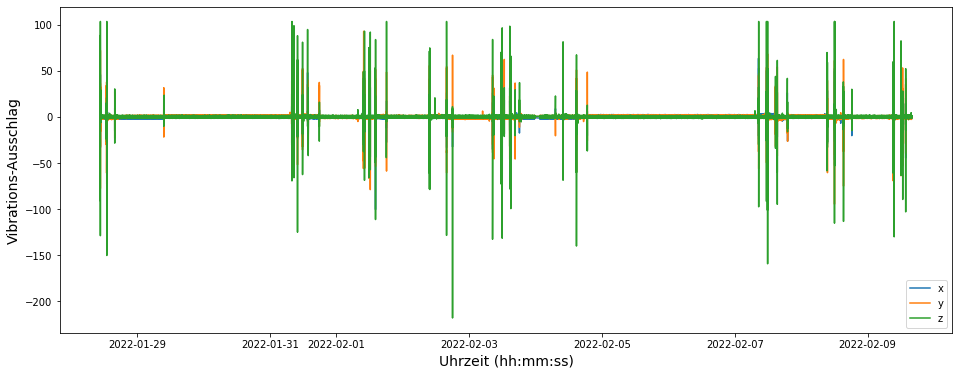

In [8]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df.time, df.x, label="x")
ax.plot(df.time, df.y, label='y')
ax.plot(df.time, df.z, label='z')

ax.set_xlabel("Uhrzeit (hh:mm:ss)", fontsize=14)
ax.set_ylabel("Vibrations-Ausschlag", fontsize=14)

plt.legend(loc=4)

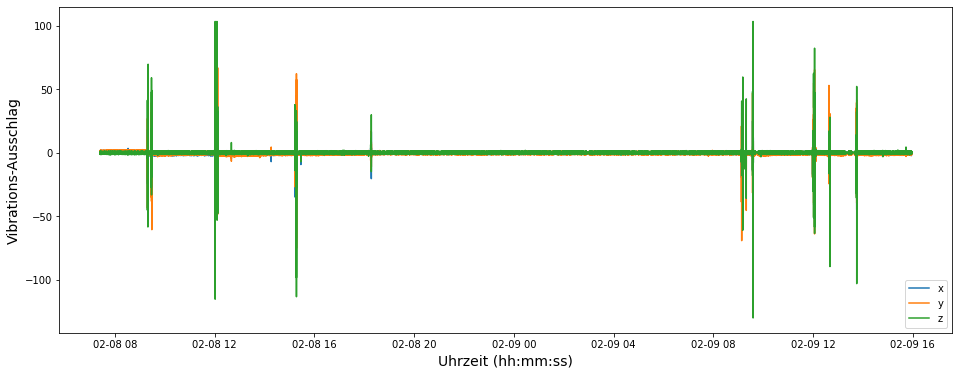

In [20]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df.time[5000000:], df.x[5000000:], label="x")
ax.plot(df.time[5000000:], df.y[5000000:], label='y')
ax.plot(df.time[5000000:], df.z[5000000:], label='z')

ax.set_xlabel("Uhrzeit (hh:mm:ss)", fontsize=14)
ax.set_ylabel("Vibrations-Ausschlag", fontsize=14)

plt.legend(loc=4)

In [28]:
#bis 500.000
#ab 1.300.000 bis 3.500.000
#ab 5.000.000
df_small = df[:500000]
df_small = df_small.append(df[1300000:3500000])
df_small = df_small.append(df[5000000:])

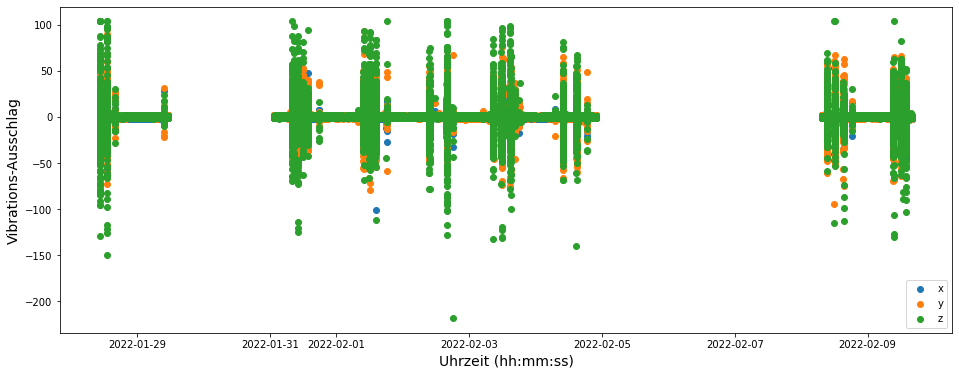

In [30]:
fig, ax = plt.subplots(figsize=(16,6))
ax.scatter(df_small.time, df_small.x, label="x")
ax.scatter(df_small.time, df_small.y, label='y')
ax.scatter(df_small.time, df_small.z, label='z')

ax.set_xlabel("Uhrzeit (hh:mm:ss)", fontsize=14)
ax.set_ylabel("Vibrations-Ausschlag", fontsize=14)

plt.legend(loc=4)

In [31]:
df_small.time = df_small.index

In [32]:
from tsfresh.utilities.dataframe_functions import roll_time_series
df_rolled = roll_time_series(df_small, column_id="id", column_sort="time", max_timeshift=250, rolling_direction=4) 
#rolling_direction: The absolute value decides, how much to shift at each step. -> um Zeit und Ressourcen zu sparen, immer 4 Schritte gehen

c:\Users\pauls\AppData\Local\Programs\Python\Python38\lib\site-packages\tsfresh\utilities\dataframe_functions.py:520: UserWarning: Your time stamps are not uniformly sampled, which makes rolling nonsensical in some domains.
  warnings.warn(
Rolling:   0%|          | 0/10 [00:00<?, ?it/s]

In [10]:
df_rolled

,time,x,y,z,id
0,1080000,-0.697528,0.488652,-0.278910,"(1, 1080003)"
1,1080001,0.248266,0.458300,0.301123,"(1, 1080003)"
2,1080002,0.063219,-0.270162,-1.412625,"(1, 1080003)"
3,1080003,-0.676967,0.519005,0.037464,"(1, 1080003)"
4,1080000,-0.697528,0.488652,-0.278910,"(1, 1080007)"
...,...,...,...,...,...
50192245,1879995,-0.841453,0.094069,0.195657,"(1, 1879999)"
50192246,1879996,-0.347996,-1.089681,-0.621659,"(1, 1879999)"
50192247,1879997,-0.347996,-0.270162,-0.727126,"(1, 1879999)"
50192248,1879998,-0.368556,-0.270162,0.169294,"(1, 1879999)"


In [11]:
# irgendwo speichern, am besten direkt im OneDrive
with open('../Innoprojekt/df_rolled_full.pickle', 'wb') as handle:
    pickle.dump(df_rolled, handle, protocol=pickle.HIGHEST_PROTOCOL)